In [2]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\chidi\Documents\Portfolio Files\Data Analyst Portfolio Project Repository\PortfolioProjects-main\movies.csv')


In [20]:
# Now let's take a look at the data

df
#df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,Walker,R,Biography,1987,"December 4, 1987 (United States)",6.6,3300.0,Alex Cox,Rudy Wurlitzer,Ed Harris,United States,5800000,0,In-Cine Compañía Industrial Cinematográfica,94.0,Dece
1199,Walk Like a Man,PG,Comedy,1987,"April 17, 1987 (United States)",4.8,1400.0,Melvin Frank,Robert Klane,Christopher Lloyd,United States,0,0,Metro-Goldwyn-Mayer (MGM),86.0,Apri
1192,White of the Eye,R,Horror,1987,"June 19, 1987 (United Kingdom)",6.2,2200.0,Donald Cammell,China Kong,David Keith,United Kingdom,0,0,Mrs. White's Productions,110.0,June
1184,Creepozoids,R,Horror,1987,"October 2, 1987 (United States)",4.0,2100.0,David DeCoteau,Dave Eisenstark,Linnea Quigley,United States,75000,0,Titan Productions,72.0,Octo


In [5]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [6]:
# Data Types for our columns

#print(df.dtypes)
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Replace non-finite values with 0 in "budget" column
df['budget'] = df['budget'].fillna(0)

# Replace non-finite values with 0 in "gross" column
df['gross'] = df['gross'].fillna(0)


In [8]:
# Convert the "budget" column to int64
df['budget'] = df['budget'].astype('int64')

# Convert the "gross" column to int64
df['gross'] = df['gross'].astype('int64')

In [9]:
# Check if there are any missing values in the DataFrame (True/False Answer)
has_missing_data = df.isnull().any().any()
print(has_missing_data)


# Check for missing values in each column
missing_data = df.isnull().sum()

# Display the missing data
print("Missing Data:")
print(missing_data)

True
Missing Data:
name         0
rating      77
genre        0
year         0
released     2
score        3
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64


In [10]:
# Create new column, 'yearcorrect' 

df['yearcorrect'] = df['released'].astype(str).str[:4]

In [21]:
# Drop a column from the DataFrame
#df = df.drop('yearcorrect', axis=1)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


In [22]:
# ordering data by 'gross'

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [19]:
# To allow all rows to display - disable the default setting

#pd.set_option('display.max_row', None)

# Setting row default values
pd.reset_option('display.max_rows')

<Axes: >

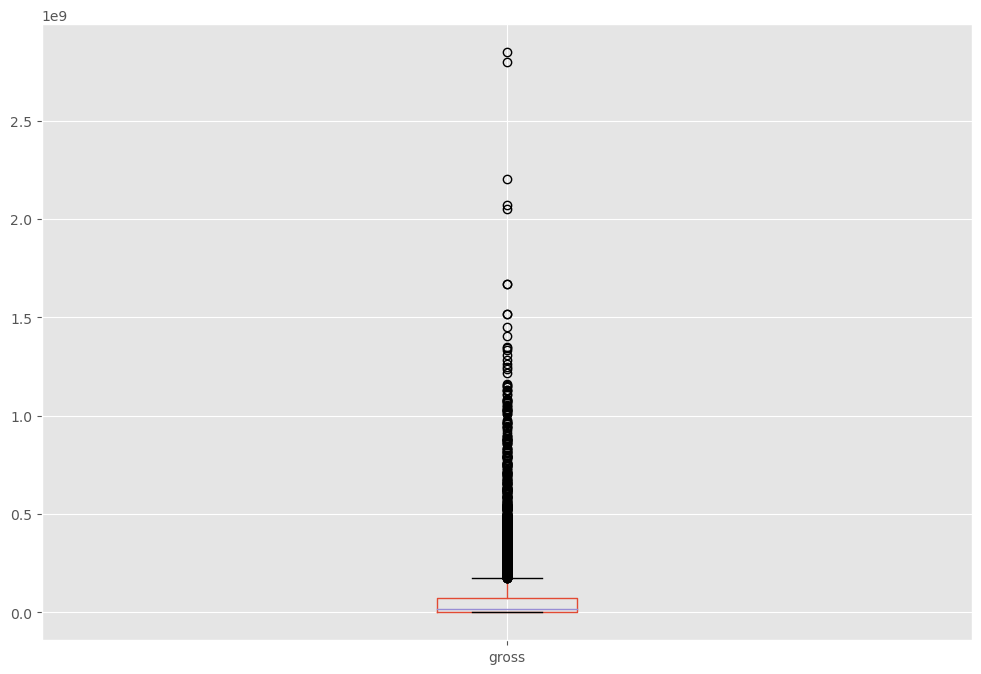

In [23]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [ ]:

# Drop any Duplicates in the entire data frame

df.drop_duplicates()

In [77]:
# Drop any Duplicates in colunmn 'Company'

# df['company'] = df['company'].drop_duplicates()  # DO NOT Run this line to drop column 'company', for education purpose only!!!

# Sort Duplicates in colunmn 'Company'

df['company'].drop_duplicates().sort_values(ascending=False)

#df['company'].sort_values(ascending=False)



7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [ ]:
# Budget high correlation
# company high correlation

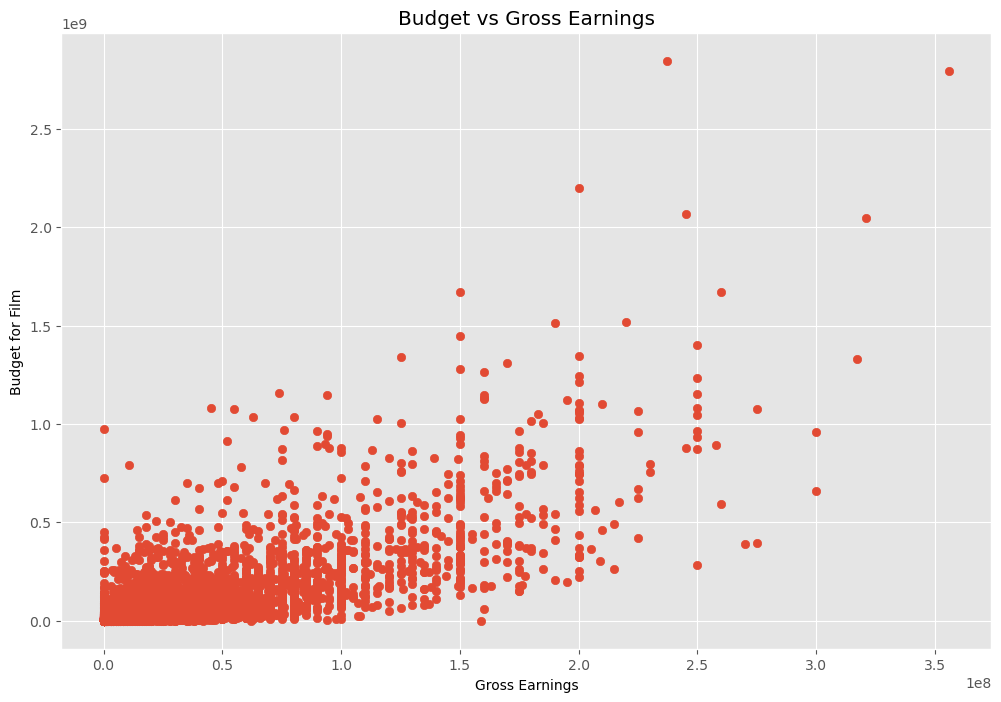

In [24]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

In [25]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


In [26]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,Cyclone,R,Action,1987,"June 5, 1987 (United States)",4.5,882.0,Fred Olen Ray,Paul Garson,Heather Thomas,United States,0,0,Cinetel Films,89.0,June
1209,"No Retreat, No Surrender 2",R,Adventure,1987,"January 27, 1989 (United States)",5.1,1600.0,Corey Yuen,Maria Elena Cellino,Loren Avedon,Hong Kong,0,0,Seasonal Film Corporation,92.0,Janu
1201,Walker,R,Biography,1987,"December 4, 1987 (United States)",6.6,3300.0,Alex Cox,Rudy Wurlitzer,Ed Harris,United States,5800000,0,In-Cine Compañía Industrial Cinematográfica,94.0,Dece
1199,Walk Like a Man,PG,Comedy,1987,"April 17, 1987 (United States)",4.8,1400.0,Melvin Frank,Robert Klane,Christopher Lloyd,United States,0,0,Metro-Goldwyn-Mayer (MGM),86.0,Apri


<Axes: xlabel='gross', ylabel='budget'>

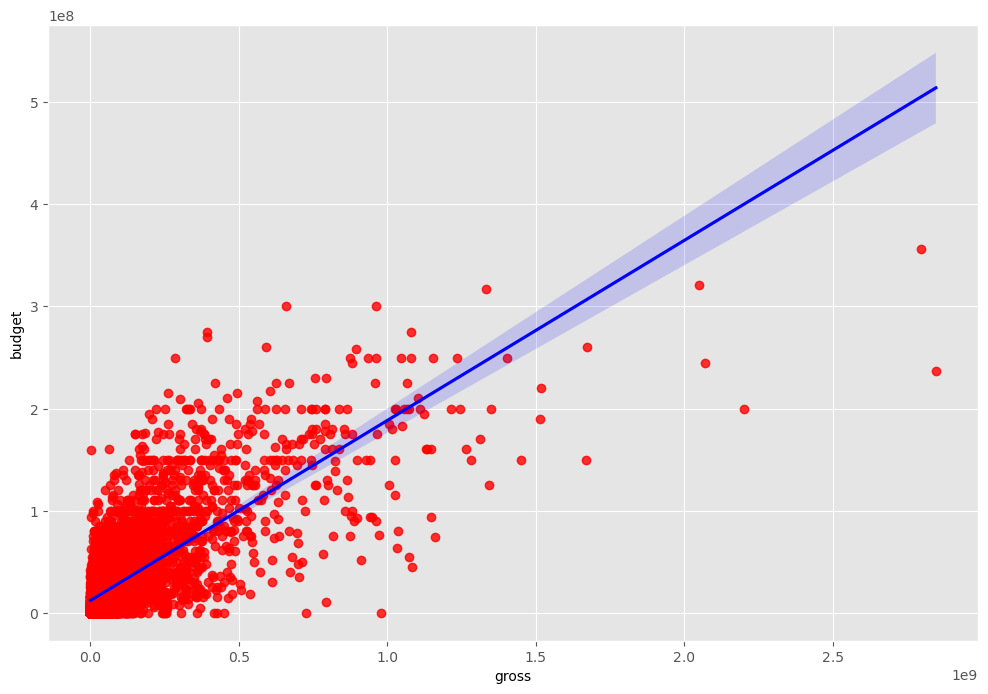

In [86]:
# Plot budget vs gross using seaborn  - To find correlation

#sns.regplot(x="gross", y="budget", data=df)
#sns.regplot(x="gross", y="budget", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

<Axes: xlabel='score', ylabel='gross'>

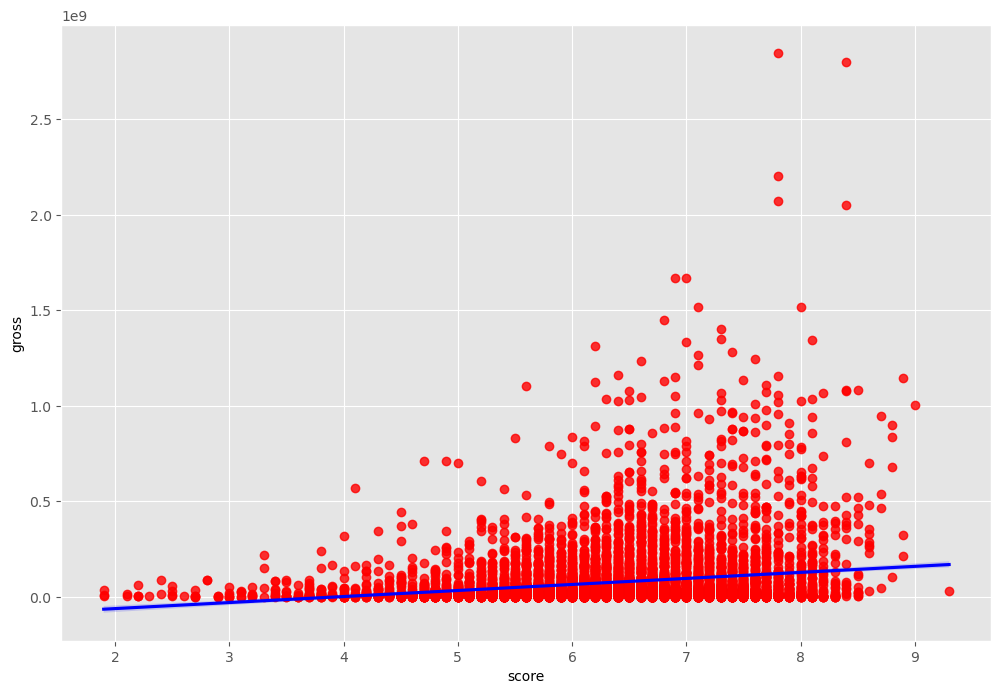

In [28]:
#sns.regplot(x="score", y="gross", data=df)
sns.regplot(x="score", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [29]:
# Correlation Matrix between all numeric columns - Correlating only numerical fields

# Select the numerical columns for correlation calculation
numerical_fields = ['year', 'score', 'votes', 'budget', 'gross', 'runtime']
numerical_df = df[numerical_fields]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr(method ='pearson')

numerical_df.corr(method ='pearson')
#df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [33]:
# Correlation Matrix between all numeric columns
# High correlation between budget and gross

# Note: Use "pearson" as the default method

numerical_df.corr(method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.291152,0.314681,0.142977
score,0.099045,1.000000,0.428138,-0.007500,0.132569,0.399857
votes,0.469829,0.428138,1.000000,0.604627,0.752265,0.290159
budget,0.291152,-0.007500,0.604627,1.000000,0.716816,0.246748
gross,0.314681,0.132569,0.752265,0.716816,1.000000,0.256783
runtime,0.142977,0.399857,0.290159,0.246748,0.256783,1.000000


In [34]:
numerical_df.corr(method ='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.209304,0.216595,0.097184
score,0.067652,1.000000,0.300115,-0.005194,0.090626,0.283611
votes,0.331465,0.300115,1.000000,0.439902,0.560118,0.198240
budget,0.209304,-0.005194,0.439902,1.000000,0.541956,0.176016
gross,0.216595,0.090626,0.560118,0.541956,1.000000,0.176912
runtime,0.097184,0.283611,0.198240,0.176016,0.176912,1.000000


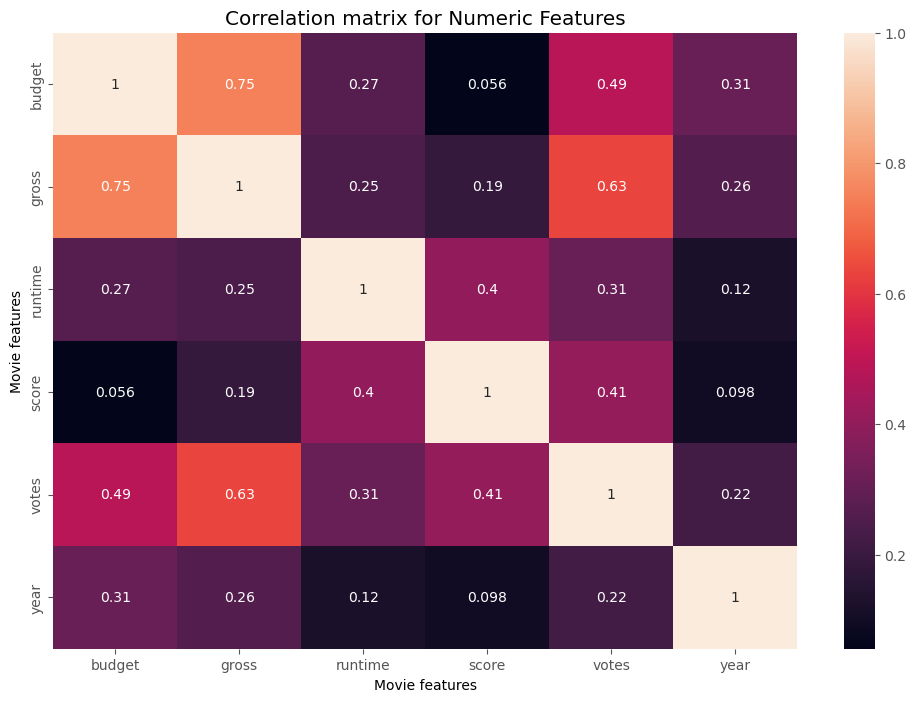

In [36]:
#correlation_matrix = df.corr()
correlation_matrix = numerical_df.corr(method ='pearson')

# Sort the column and index labels in alphabetical order
correlation_matrix = correlation_matrix.sort_index(axis=0).sort_index(axis=1)

sns.heatmap(correlation_matrix, annot = True)
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [37]:
# Convert categorical columns to numeric representation
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
#df_numerized

In [38]:
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,10
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,8
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,10
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,10
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,1925,5,4,1989,194,4.5,653.0,1881,3857,480,55,0,0,879,92.0,8
1629,4582,6,0,1989,3327,4.3,1100.0,2631,144,1857,55,0,0,470,107.0,19
1617,3712,6,5,1989,1277,4.5,274.0,117,82,2797,55,0,0,1159,92.0,12
1614,1745,6,10,1989,55,5.2,1300.0,1033,1743,166,54,0,0,146,85.0,8


In [39]:
df.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,-0.011725
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.013475
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,0.028397
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,-0.001562
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868,0.993694
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.040993
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.017337
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.000105
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.002892
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,0.015406


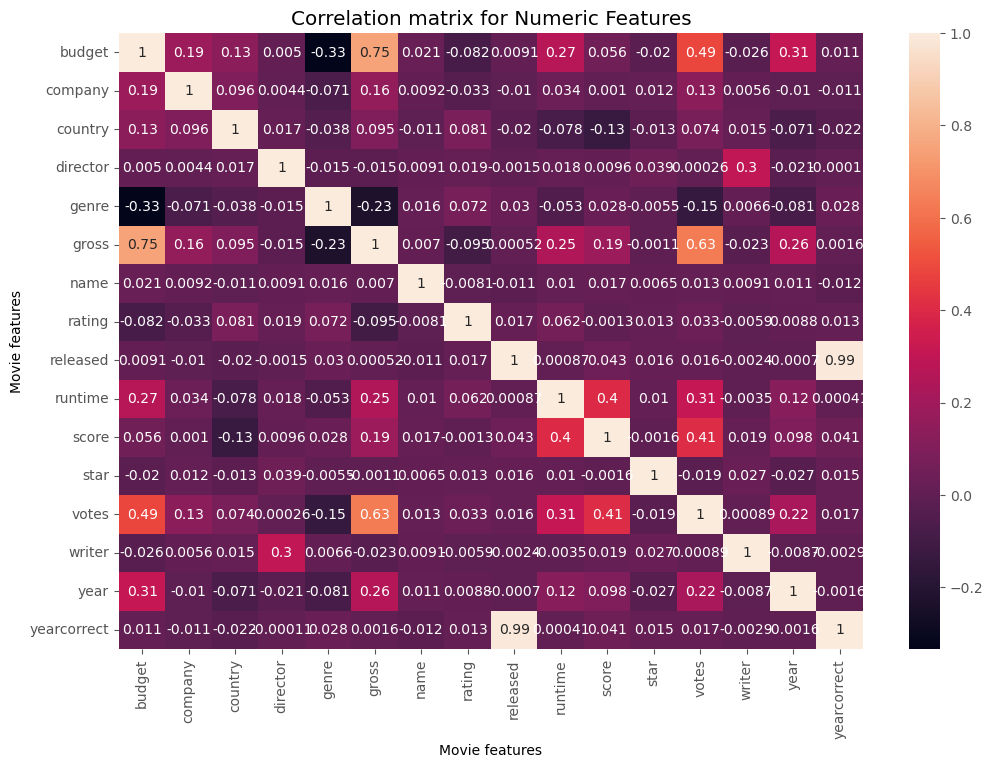

In [40]:
correlation_matrix = df.corr(method ='pearson')

# Sort the column and index labels in alphabetical order
correlation_matrix = correlation_matrix.sort_index(axis=0).sort_index(axis=1)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [41]:

# Now we need to read in the data
df = pd.read_csv(r'C:\Users\chidi\Documents\Portfolio Files\Data Analyst Portfolio Project Repository\PortfolioProjects-main\movies.csv')

# Order our Data a little bit to see
df.sort_values(by=['gross'], inplace=False, ascending=False)

# Replace non-finite values with 0 in "budget" column
df['budget'] = df['budget'].fillna(0)
# Replace non-finite values with 0 in "gross" column
df['gross'] = df['gross'].fillna(0)

# Convert the "budget" column to int64
df['budget'] = df['budget'].astype('int64')
# Convert the "gross" column to int64
df['gross'] = df['gross'].astype('int64')



In [42]:
# Order our Data a little bit to see
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0


In [43]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.143938,0.036367,0.965761,0.959015,-0.046733,0.287776,0.745905,0.805211,0.731565,0.142828,0.275691,0.947540,0.591667,0.048955
rating,0.143938,1.000000,-0.086723,0.156713,0.146606,0.012595,0.099972,0.085520,0.103623,0.093116,0.000494,0.193229,0.158575,-0.028035,0.032741
genre,0.036367,-0.086723,1.000000,0.037184,0.035940,-0.002437,0.023285,0.047288,0.033688,0.038649,-0.015795,0.069445,0.038635,0.009566,0.001462
year,0.965761,0.156713,0.037184,1.000000,0.993190,-0.044981,0.312401,0.770497,0.824770,0.756400,0.140216,0.298022,0.981090,0.601571,0.050647
released,0.959015,0.146606,0.035940,0.993190,1.000000,-0.045761,0.299905,0.770876,0.819617,0.754468,0.148468,0.284017,0.976647,0.607954,0.048235
score,-0.046733,0.012595,-0.002437,-0.044981,-0.045761,1.000000,-0.009749,-0.022687,-0.034685,-0.009896,0.023097,-0.011749,-0.047004,-0.028432,0.026436
votes,0.287776,0.099972,0.023285,0.312401,0.299905,-0.009749,1.000000,0.192220,0.224122,0.179601,-0.045914,0.395374,0.286308,0.008900,0.106024
director,0.745905,0.085520,0.047288,0.770497,0.770876,-0.022687,0.192220,1.000000,0.748340,0.682385,0.155471,0.108033,0.751149,0.552258,-0.011070
writer,0.805211,0.103623,0.033688,0.824770,0.819617,-0.034685,0.224122,0.748340,1.000000,0.675685,0.157202,0.186680,0.805784,0.546151,0.032264
star,0.731565,0.093116,0.038649,0.756400,0.754468,-0.009896,0.179601,0.682385,0.675685,1.000000,0.182045,0.110870,0.735911,0.527116,0.035392


In [ ]:
# Using lambda to format the data into numerical values, that is numerizing the data
# With lambda you don't need to run a separate code to numerize non-numerical fields

correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

# Sort the column and index labels in alphabetical order
correlation_matrix = correlation_matrix.sort_index(axis=0).sort_index(axis=1)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [120]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174


In [45]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating      0.143938
         genre       0.036367
         year        0.965761
         released    0.959015
                       ...   
runtime  country     0.124154
         budget      0.115359
         gross       0.043017
         company     0.005137
         runtime     1.000000
Length: 225, dtype: float64


In [46]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

budget   company   -0.087285
company  budget    -0.087285
genre    rating    -0.086723
rating   genre     -0.086723
budget   country   -0.068884
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [47]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

star      company    0.527116
company   star       0.527116
          writer     0.546151
writer    company    0.546151
director  company    0.552258
                       ...   
year      year       1.000000
genre     genre      1.000000
rating    rating     1.000000
company   company    1.000000
runtime   runtime    1.000000
Length: 71, dtype: float64


In [71]:
# Looking at the top 15 companies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(by='gross', ascending = False)[:15]

CompanyGrossSumSorted['gross'] = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

,gross
company,
Warner Bros.,56491421806
Universal Pictures,52514188890
Columbia Pictures,43008941346
Paramount Pictures,40493607415
Twentieth Century Fox,40257053857
Walt Disney Pictures,36327887792
New Line Cinema,19883797684
Marvel Studios,15065592411
DreamWorks Animation,11873612858


In [78]:
# Looking at the top 15 companies by gross revenue

CompanyGrossSum = df.groupby('company')[["budget"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('budget', ascending = False)[:15]

CompanyGrossSumSorted['budget']= CompanyGrossSumSorted['budget'].astype('int64') 

CompanyGrossSumSorted

,budget
company,
Warner Bros.,19568300000
Universal Pictures,15989730001
Columbia Pictures,15512107000
Paramount Pictures,13723450000
Twentieth Century Fox,11474600000
Walt Disney Pictures,10404700000
New Line Cinema,5648200000
Touchstone Pictures,4153700000
Dreamworks Pictures,3961700000


In [77]:
# Looking at the top 15 companies by gross revenue
CompanyGrossSummed = df.groupby('company')[['budget', 'gross']].sum()
CompanyGrossSummedSorted = CompanyGrossSummed.sort_values(by='gross', ascending=False).head(15)
CompanyGrossSummedSorted['gross'] = CompanyGrossSummedSorted['gross'].astype('int64')
CompanyGrossSummedSorted

,budget,gross
company,,
Warner Bros.,19568300000,56491421806
Universal Pictures,15989730001,52514188890
Columbia Pictures,15512107000,43008941346
Paramount Pictures,13723450000,40493607415
Twentieth Century Fox,11474600000,40257053857
Walt Disney Pictures,10404700000,36327887792
New Line Cinema,5648200000,19883797684
Marvel Studios,2664000000,15065592411
DreamWorks Animation,3344000000,11873612858


In [79]:
df['Year'] = df['released'].astype(str).str[:4]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July


In [80]:
# Looking at the top 15 companies by Year

df.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926
"""Weathering With You"" Film Partners",2019,193457467
.406 Production,1996,10580
1+2 Seisaku Iinkai,2000,1196218
10 West Studios,2010,814906
...,...,...
i am OTHER,2015,17986781
i5 Films,2001,10031529
iDeal Partners Film Fund,2013,506303


In [83]:

CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted['year'] = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

gross        year
company               year                        
Walt Disney Pictures  2019  5773131804  5773131804
Marvel Studios        2018  4018631866  4018631866
Universal Pictures    2015  3834354888  3834354888
Twentieth Century Fox 2009  3793491246  3793491246
Walt Disney Pictures  2017  3789382071  3789382071
Paramount Pictures    2011  3565705182  3565705182
Warner Bros.          2010  3300479986  3300479986
                      2011  3223799224  3223799224
Walt Disney Pictures  2010  3104474158  3104474158
Paramount Pictures    2014  3071298586  3071298586
Columbia Pictures     2006  2934631933  2934631933
                      2019  2932757449  2932757449
Marvel Studios        2019  2797501328  2797501328
Warner Bros.          2018  2774168962  2774168962
Columbia Pictures     2011  2738363306  2738363306

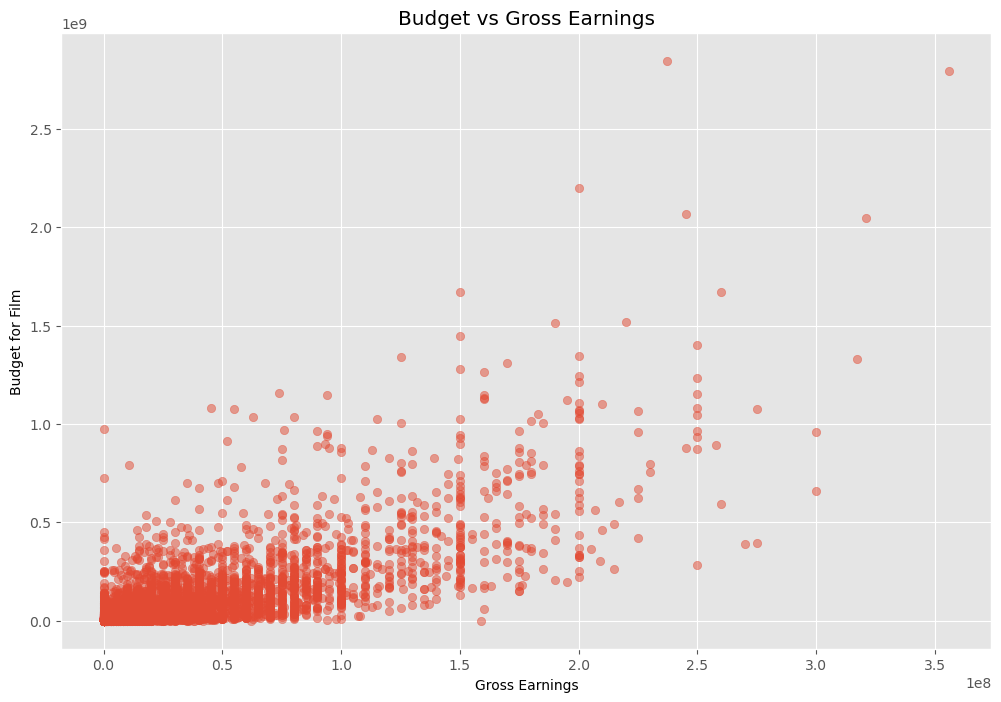

In [87]:
# Sort the column and index labels in alphabetical order
#correlation_matrix = correlation_matrix.sort_index(axis=0).sort_index(axis=1)
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [199]:
df


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
6819,0.0,1393,16,1918,6,37757.0,1971,8,2398,120,6.7,1558,2411,2831,2016,NaN,NaN,31
1871,0.0,1680,54,2145,4,18137661.0,3332,7,667,110,5.5,1633,9880,1993,1994,NaN,NaN,8
1852,0.0,2062,54,1564,7,17193886.0,3346,6,687,114,6.4,1968,24126,4034,1994,NaN,NaN,8
1854,0.0,1544,54,645,4,1596700.0,1031,8,636,102,5.0,2342,4804,1885,1994,NaN,NaN,8
1855,0.0,1811,16,1968,3,2017346.0,4026,8,691,159,7.5,925,14377,123,1994,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,250000000.0,1491,54,1412,0,459005868.0,502,7,2239,141,7.4,2001,537832,2145,2015,NaN,NaN,29
6194,250000000.0,1582,34,2045,1,255119788.0,5420,7,2207,144,7.4,911,396797,1231,2014,NaN,NaN,28
4637,258000000.0,664,54,2317,0,336530303.0,4632,7,1615,139,6.2,2334,416842,3541,2007,NaN,NaN,21
5293,260000000.0,2119,54,1882,2,200821936.0,4877,6,1876,100,7.8,1536,325621,749,2010,NaN,NaN,24


In [200]:
# Numerizing categorical columns

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
6819,0.0,1393,16,1918,6,37757.0,1971,8,2398,120,6.7,1558,2411,2831,2016,NaN,NaN,31
1871,0.0,1680,54,2145,4,18137661.0,3332,7,667,110,5.5,1633,9880,1993,1994,NaN,NaN,8
1852,0.0,2062,54,1564,7,17193886.0,3346,6,687,114,6.4,1968,24126,4034,1994,NaN,NaN,8
1854,0.0,1544,54,645,4,1596700.0,1031,8,636,102,5.0,2342,4804,1885,1994,NaN,NaN,8
1855,0.0,1811,16,1968,3,2017346.0,4026,8,691,159,7.5,925,14377,123,1994,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,250000000.0,1491,54,1412,0,459005868.0,502,7,2239,141,7.4,2001,537832,2145,2015,NaN,NaN,29
6194,250000000.0,1582,34,2045,1,255119788.0,5420,7,2207,144,7.4,911,396797,1231,2014,NaN,NaN,28
4637,258000000.0,664,54,2317,0,336530303.0,4632,7,1615,139,6.2,2334,416842,3541,2007,NaN,NaN,21
5293,260000000.0,2119,54,1882,2,200821936.0,4877,6,1876,100,7.8,1536,325621,749,2010,NaN,NaN,24


In [85]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,-0.011725
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.013475
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,0.028397
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,-0.001562
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868,0.993694
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.040993
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.017337
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.000105
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.002892
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,0.015406


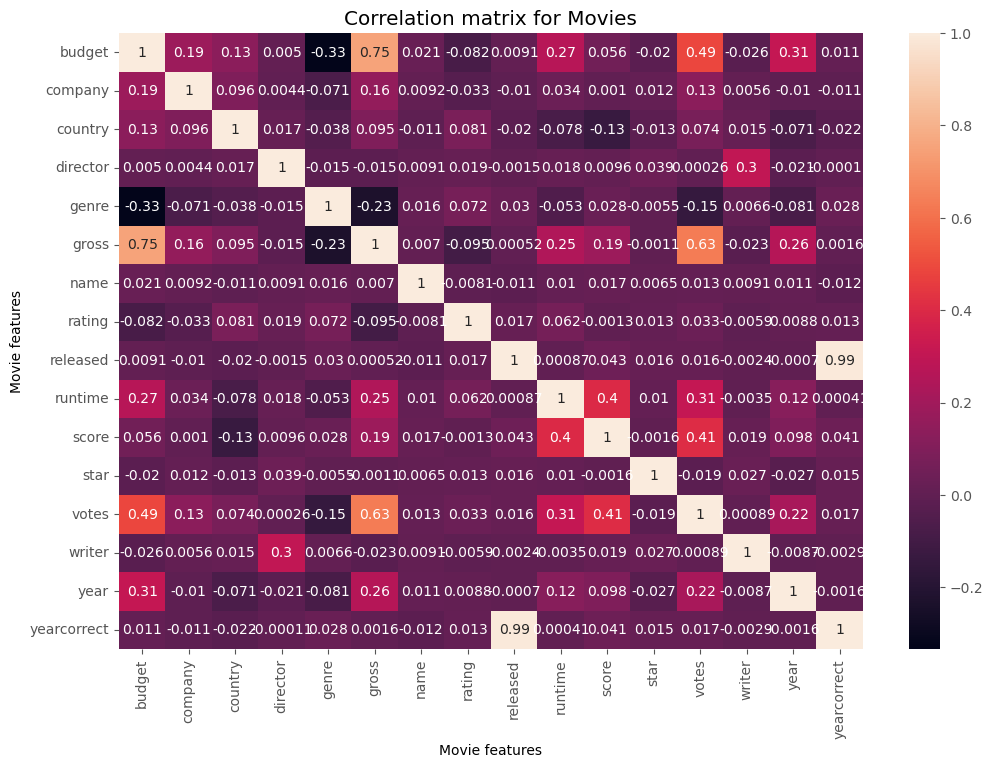

In [89]:
correlation_matrix = df_numerized.corr(method='pearson')

# Sort the column and index labels in alphabetical order
correlation_matrix = correlation_matrix.sort_index(axis=0).sort_index(axis=1)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

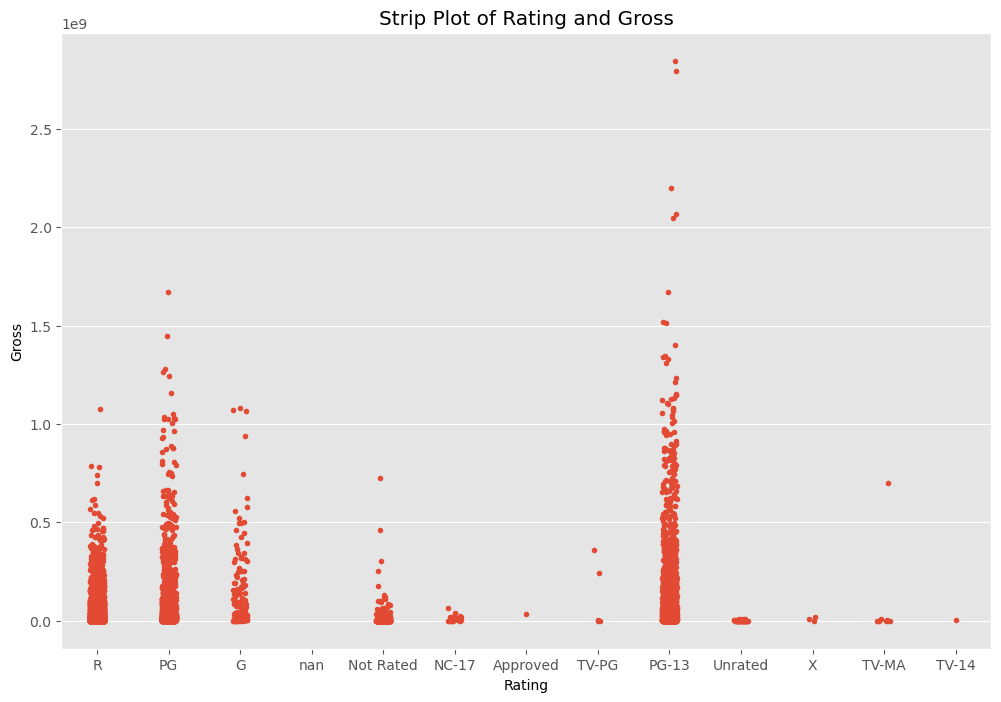

In [98]:
# Create strip plot of 'rating' and 'gross'
sns.stripplot(x='rating', y='gross', data=df, size=4)

# Set plot title and axis labels
plt.title('Strip Plot of Rating and Gross')
plt.xlabel('Rating')
plt.ylabel('Gross')

# Display the plot
plt.show()

In [ ]:

# Create swarm plot
sns.swarmplot(x=df['rating'], y=df['gross'])

# Display the plot
plt.show()


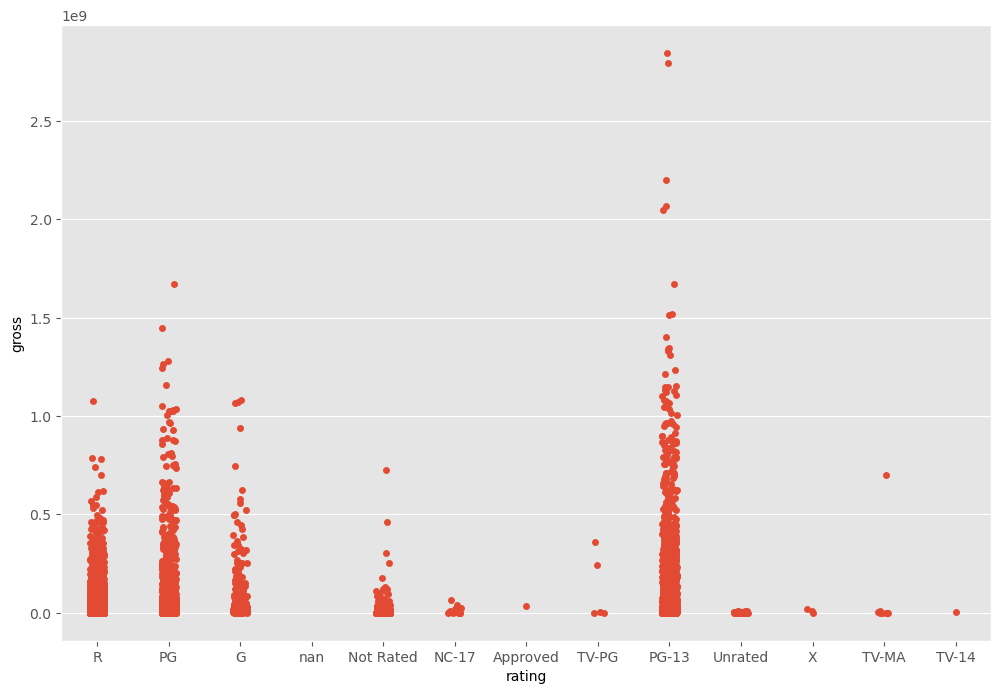

In [97]:
sns.stripplot(x="rating", y="gross", data=df)

# Display the plot
plt.show()